In [1]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'white', 'lightcoral', 'red', 'darkred']
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

In [2]:
df3 = pd.read_csv('log_4.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df3['chance_of_selfishness'] = df3['chance_of_selfishness']

# df3 = df3.sort_values(by=['percentage_lazy'])

# df3.tail()

df3['percentage_wandering'] = 1-df3['percentage_lazy']
df3['adjusted_fitness'] = (df3['num_agents'] * df3['avg_health']) / 20


# df3.head()

df3['adjusted_chance_of_selfishness'] = df3['chance_of_selfishness'] * df3['percentage_wandering']
df3['adjusted_chance_of_sharing'] = (1-df3['chance_of_selfishness']) * df3['percentage_wandering']

# df3.head()

percentage_lazy = df3['percentage_lazy']
coself = df3['adjusted_chance_of_selfishness']
cosharing = df3['adjusted_chance_of_sharing']
num_agents = df3['num_agents']
avg_health = df3['avg_health']
fitness = df3['adjusted_fitness']

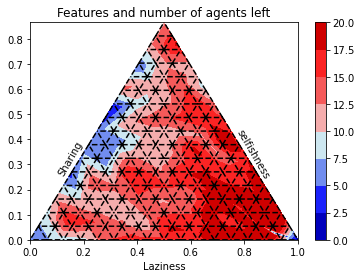

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

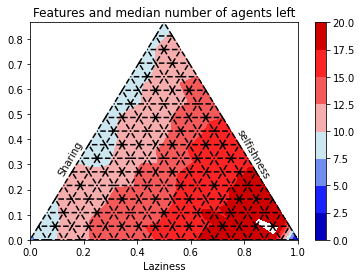

In [4]:
grouped_multiple = df3.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

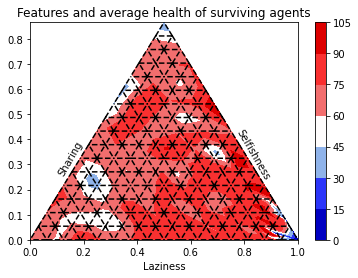

In [5]:
percentage_lazy = df3['percentage_lazy']
coself = df3['adjusted_chance_of_selfishness']
cosharing = df3['adjusted_chance_of_sharing']
num_agents = df3['num_agents']
avg_health = df3['avg_health']
fitness = df3['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

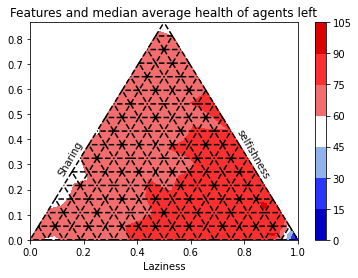

In [6]:
grouped_multiple = df3.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
average = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = average

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median average health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

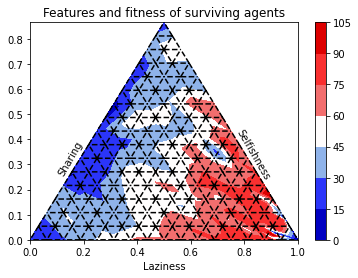

In [7]:
percentage_lazy = df3['percentage_lazy']
coself = df3['adjusted_chance_of_selfishness']
cosharing = df3['adjusted_chance_of_sharing']
num_agents = df3['num_agents']
avg_health = df3['avg_health']
fitness = df3['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

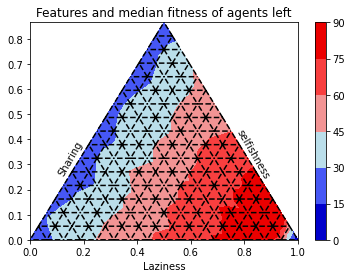

In [8]:
grouped_multiple = df3.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
fitness = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [51]:
df = df3

In [57]:
pd.set_option('display.max_rows', 150)
g = df.groupby(['percentage_lazy', 'chance_of_selfishness'])['num_agents'].median()
f = df.groupby(['percentage_lazy', 'chance_of_selfishness'])['adjusted_fitness'].median()

In [58]:
g

percentage_lazy  chance_of_selfishness
0.0              0.0                       9.0
                 0.1                       9.5
                 0.2                       8.0
                 0.3                       9.0
                 0.4                       8.5
                 0.5                       7.5
                 0.6                       9.0
                 0.7                      11.0
                 0.8                      10.0
                 0.9                       9.0
                 1.0                       7.0
0.1              0.0                      11.0
                 0.1                      11.0
                 0.2                      10.5
                 0.3                      10.0
                 0.4                      11.5
                 0.5                      10.0
                 0.6                       9.5
                 0.7                      11.0
                 0.8                      10.5
                 0.9 

In [59]:
f

percentage_lazy  chance_of_selfishness
0.0              0.0                      21.018125
                 0.1                      27.432222
                 0.2                      25.082847
                 0.3                      24.142500
                 0.4                      26.519097
                 0.5                      23.054097
                 0.6                      23.806458
                 0.7                      25.727431
                 0.8                      26.200833
                 0.9                      29.147708
                 1.0                      20.425972
0.1              0.0                      31.058125
                 0.1                      31.925139
                 0.2                      30.533264
                 0.3                      34.852431
                 0.4                      34.544236
                 0.5                      30.460764
                 0.6                      33.760000
                 0.7     

In [9]:
grouped_multiple = df3.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness', 'chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()

c = grouped_multiple.loc[(grouped_multiple['chance_of_selfishness']==1) | (grouped_multiple['chance_of_selfishness']==0)]

grouped_multiple = df3.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness', 'chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()

b = grouped_multiple.loc[(grouped_multiple['chance_of_selfishness']==1) | (grouped_multiple['chance_of_selfishness']==0)]

b = b[['percentage_lazy', 'chance_of_selfishness', 'adjusted_fitness']]
new_df = pd.merge(b, c,  how='inner', on = ['percentage_lazy','chance_of_selfishness'])


new_df[['percentage_lazy', 'chance_of_selfishness', 'num_agents', 'adjusted_fitness']]

,percentage_lazy,chance_of_selfishness,num_agents,adjusted_fitness
0,0.0,1.0,7.0,20.425972
1,0.0,0.0,9.0,21.018125
2,0.1,1.0,10.0,31.379514
3,0.1,0.0,11.0,31.058125
4,0.2,1.0,12.0,40.240972
5,0.2,0.0,12.0,44.273819
6,0.3,1.0,14.0,50.395347
7,0.3,0.0,13.0,48.653264
8,0.4,1.0,14.0,55.074975
9,0.4,0.0,14.0,54.434653


# Selfish experiments

In [10]:

selfishness = df3.loc[(df3['percentage_lazy']==0)]



In [11]:
selfishness

,percentage_lazy,chance_of_selfishness,num_agents,avg_health,percentage_wandering,adjusted_fitness,adjusted_chance_of_selfishness,adjusted_chance_of_sharing
0,0.0,0.0,12,32.409259,1.0,19.445556,0.0,1.0
1,0.0,0.0,17,37.647386,1.0,32.000278,0.0,1.0
2,0.0,0.0,13,26.192735,1.0,17.025278,0.0,1.0
3,0.0,0.0,8,29.327431,1.0,11.730972,0.0,1.0
4,0.0,0.0,18,25.151080,1.0,22.635972,0.0,1.0
...,...,...,...,...,...,...,...,...
1315,0.0,1.0,9,44.163580,1.0,19.873611,1.0,0.0
1316,0.0,1.0,8,62.719097,1.0,25.087639,1.0,0.0
1317,0.0,1.0,5,22.661111,1.0,5.665278,1.0,0.0
1318,0.0,1.0,14,64.883929,1.0,45.418750,1.0,0.0


Text(0, 0.5, 'Average number (20 runs) of agents that survived')

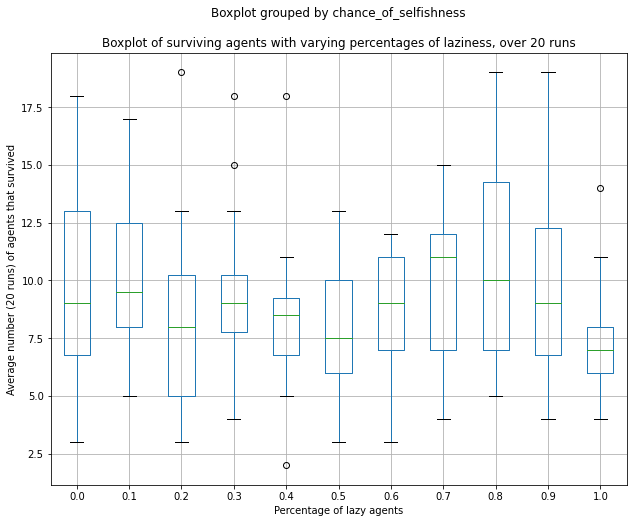

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

selfishness.boxplot(column=['num_agents'], by='chance_of_selfishness', ax=ax)
ax.set_title("Boxplot of surviving agents with varying percentages of laziness, over 20 runs")
ax.set_xlabel("Percentage of lazy agents")
ax.set_ylabel("Average number (20 runs) of agents that survived")

Text(0, 0.5, 'Fitness')

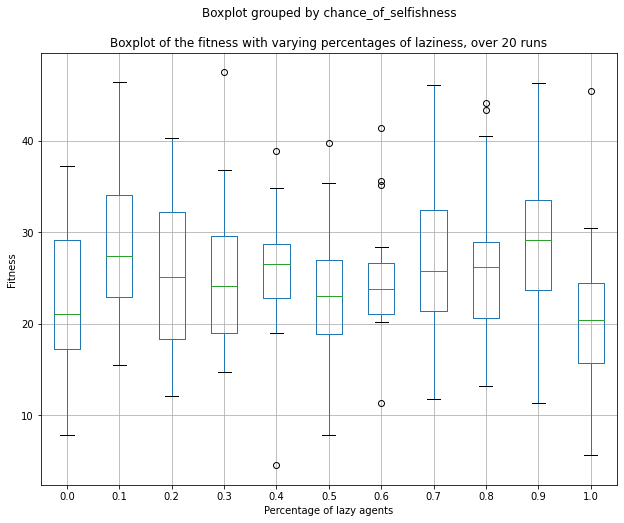

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

selfishness.boxplot(column=['adjusted_fitness'], by='chance_of_selfishness', ax=ax)
ax.set_title("Boxplot of the fitness with varying percentages of laziness, over 20 runs")
ax.set_xlabel("Percentage of lazy agents")
ax.set_ylabel("Fitness")

Text(0, 0.5, 'Average health')

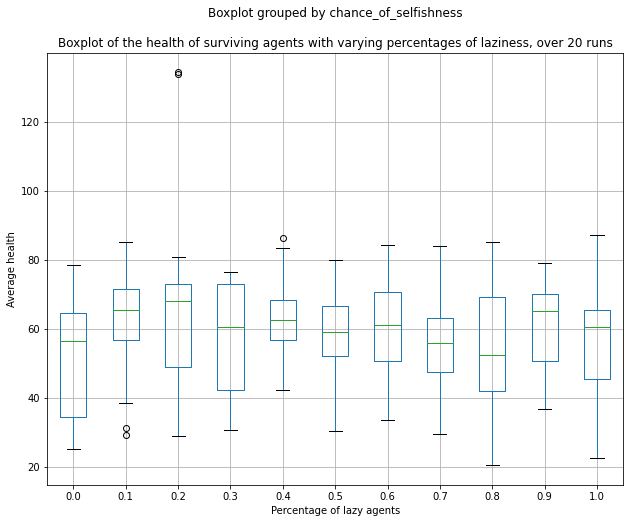

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

selfishness.boxplot(column=['avg_health'], by='chance_of_selfishness', ax=ax)
ax.set_title("Boxplot of the health of surviving agents with varying percentages of laziness, over 20 runs")
ax.set_xlabel("Percentage of lazy agents")
ax.set_ylabel("Average health")

In [15]:
selfishness.groupby(['chance_of_selfishness'])['num_agents'].describe()

,count,mean,std,min,25%,50%,75%,max
chance_of_selfishness,,,,,,,,
0.0,20.0,9.90,4.253791,3.0,6.75,9.0,13.00,18.0
0.1,20.0,10.05,3.899730,5.0,8.00,9.5,12.50,17.0
0.2,20.0,8.40,3.978892,3.0,5.00,8.0,10.25,19.0
0.3,20.0,9.35,3.468277,4.0,7.75,9.0,10.25,18.0
0.4,20.0,8.40,3.084767,2.0,6.75,8.5,9.25,18.0
0.5,20.0,8.15,2.739093,3.0,6.00,7.5,10.00,13.0
0.6,20.0,8.65,2.539685,3.0,7.00,9.0,11.00,12.0
0.7,20.0,10.05,3.456116,4.0,7.00,11.0,12.00,15.0
0.8,20.0,10.70,4.181413,5.0,7.00,10.0,14.25,19.0


In [16]:
selfishness.groupby(['chance_of_selfishness'])['adjusted_fitness'].describe()

,count,mean,std,min,25%,50%,75%,max
chance_of_selfishness,,,,,,,,
0.0,20.0,23.073849,8.376633,7.872778,17.217153,21.018125,29.103819,37.196111
0.1,20.0,29.059972,9.289694,15.502361,22.885590,27.432222,34.076042,46.386250
0.2,20.0,25.518028,9.130024,12.107639,18.280243,25.082847,32.227604,40.288194
0.3,20.0,25.407118,8.394725,14.701944,18.968542,24.142500,29.625660,47.430694
0.4,20.0,25.561444,7.018546,4.560972,22.805486,26.519097,28.723854,38.886389
0.5,20.0,23.679806,7.614536,7.814722,18.868194,23.054097,26.918576,39.746806
0.6,20.0,25.108625,6.490061,11.364583,21.103021,23.806458,26.675556,41.378889
0.7,20.0,27.026674,8.887169,11.810139,21.344479,25.727431,32.393125,46.026111
0.8,20.0,26.492208,9.110469,13.240417,20.666042,26.200833,28.932604,44.131944


In [17]:
4.253791 / 2.336777

1.8203666845402875

In [18]:
selfishness

,percentage_lazy,chance_of_selfishness,num_agents,avg_health,percentage_wandering,adjusted_fitness,adjusted_chance_of_selfishness,adjusted_chance_of_sharing
0,0.0,0.0,12,32.409259,1.0,19.445556,0.0,1.0
1,0.0,0.0,17,37.647386,1.0,32.000278,0.0,1.0
2,0.0,0.0,13,26.192735,1.0,17.025278,0.0,1.0
3,0.0,0.0,8,29.327431,1.0,11.730972,0.0,1.0
4,0.0,0.0,18,25.151080,1.0,22.635972,0.0,1.0
...,...,...,...,...,...,...,...,...
1315,0.0,1.0,9,44.163580,1.0,19.873611,1.0,0.0
1316,0.0,1.0,8,62.719097,1.0,25.087639,1.0,0.0
1317,0.0,1.0,5,22.661111,1.0,5.665278,1.0,0.0
1318,0.0,1.0,14,64.883929,1.0,45.418750,1.0,0.0


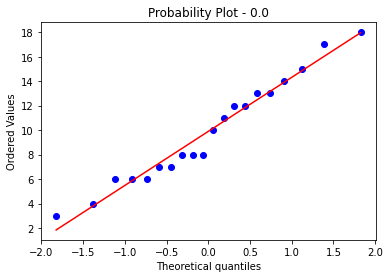

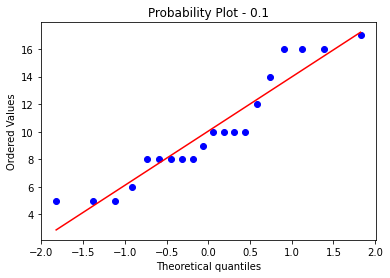

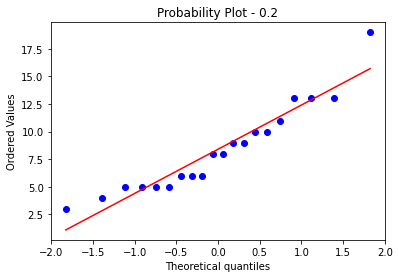

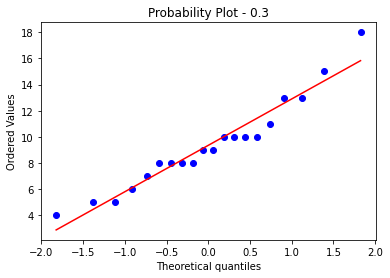

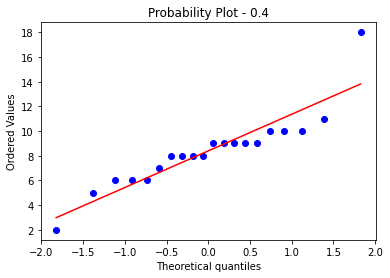

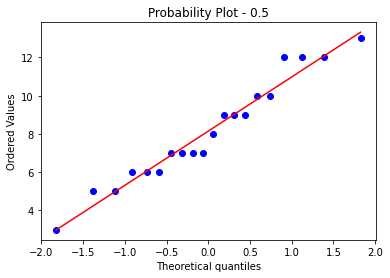

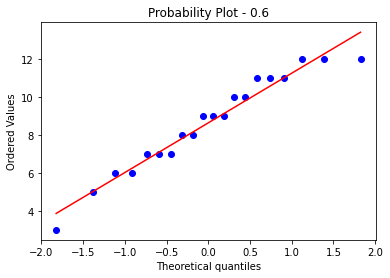

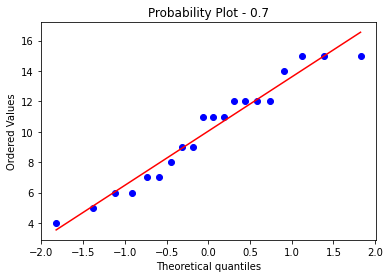

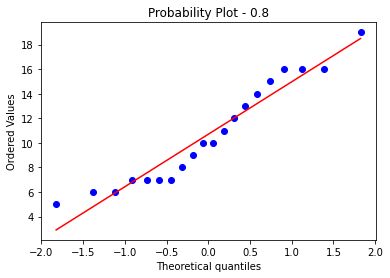

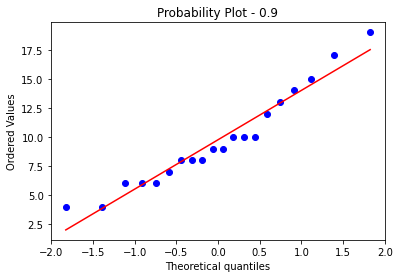

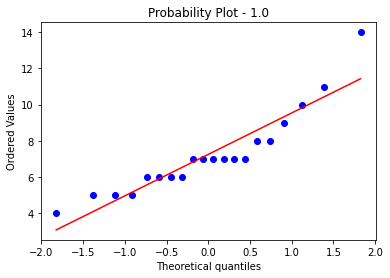

In [19]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['chance_of_selfishness'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['chance_of_selfishness'] == major]['num_agents'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

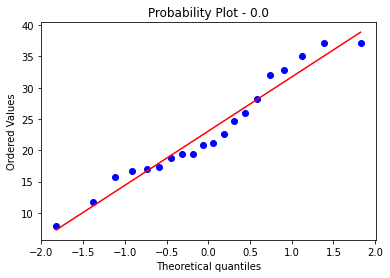

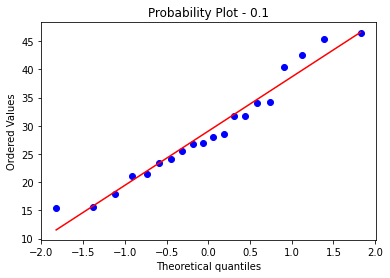

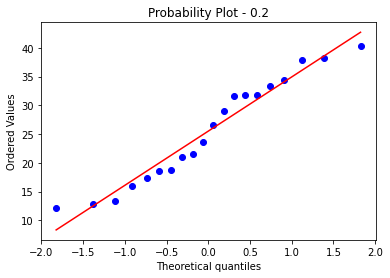

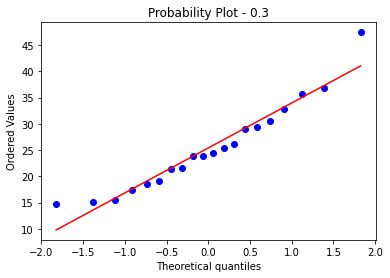

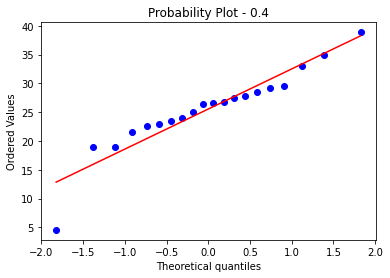

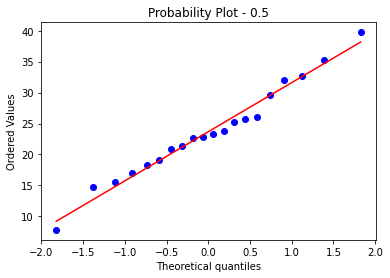

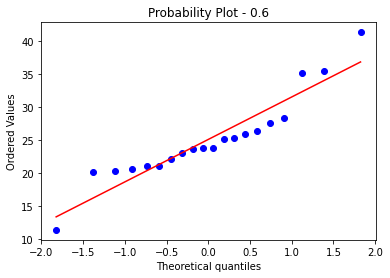

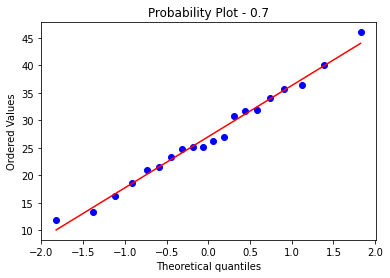

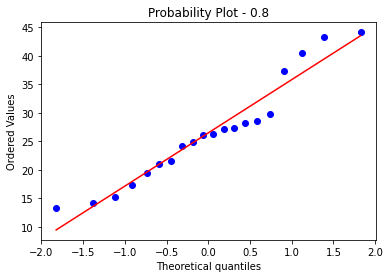

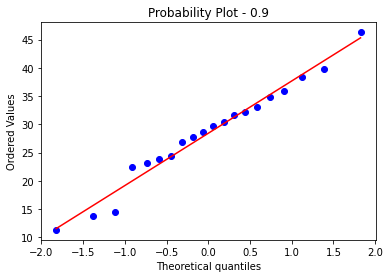

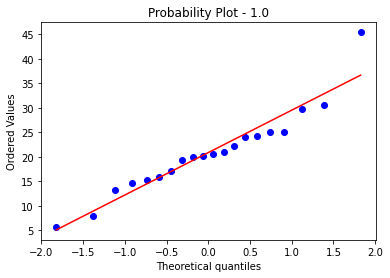

In [20]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['chance_of_selfishness'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['chance_of_selfishness'] == major]['adjusted_fitness'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

# Poisson

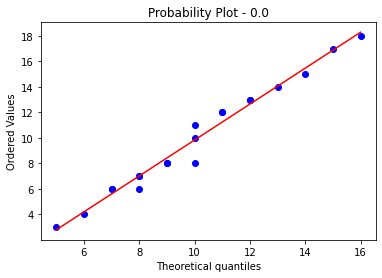

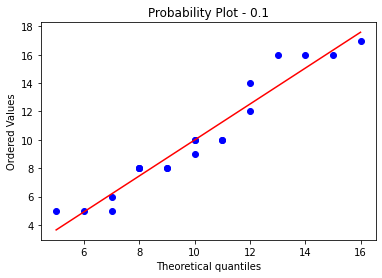

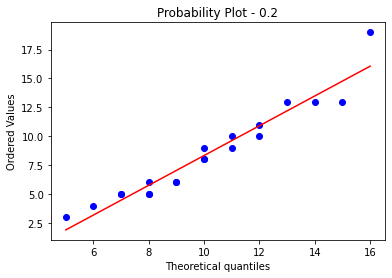

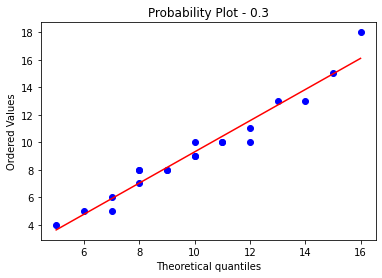

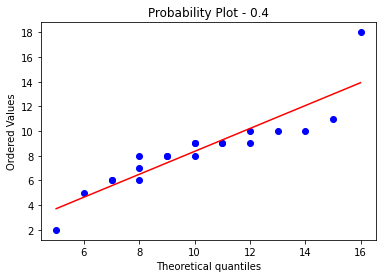

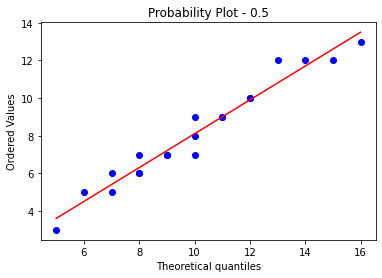

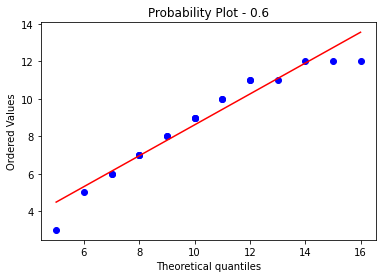

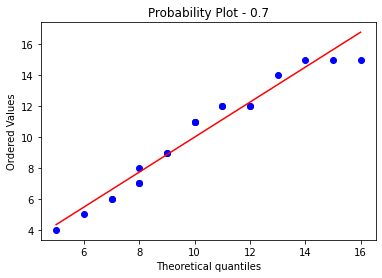

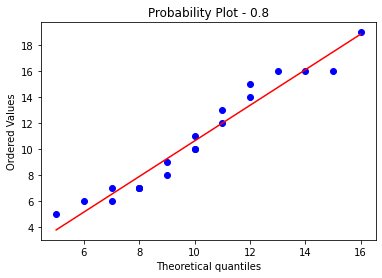

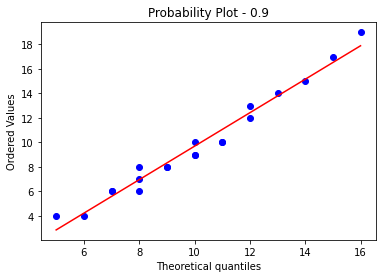

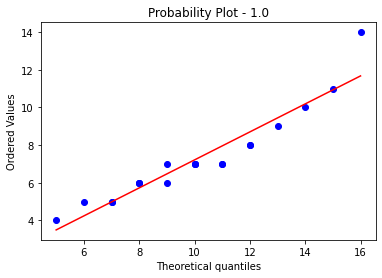

In [21]:
unique_selfishness = selfishness['chance_of_selfishness'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['chance_of_selfishness'] == major]['num_agents'], dist=stats.poisson(mu=10), plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

In [22]:
ratio = selfishness.groupby('chance_of_selfishness').std().max() / selfishness.groupby('chance_of_selfishness').std().min()
ratio

percentage_lazy                        NaN
num_agents                        1.820367
avg_health                        2.356701
percentage_wandering                   NaN
adjusted_fitness                  1.431372
adjusted_chance_of_selfishness         NaN
adjusted_chance_of_sharing             NaN
dtype: float64

In [23]:
selfishness2 = selfishness[['chance_of_selfishness', 'num_agents', 'adjusted_fitness']]
# selfishness2['chance_of_selfishness'] = selfishness2[['chance_of_selfishness']].apply(lambda x: x.astype('string'))
# selfishness2['chance_of_selfishness'] = selfishness2['chance_of_selfishness'].astype('string')
# selfishness2['chance_of_selfishness'] = selfishness2['chance_of_selfishness'].astype(str)


In [24]:
ratio = selfishness2.groupby('chance_of_selfishness').std().max() / selfishness2.groupby('chance_of_selfishness').std().min()
ratio

num_agents          1.820367
adjusted_fitness    1.431372
dtype: float64

In [25]:
selfishness2.dtypes

chance_of_selfishness    float64
num_agents                 int64
adjusted_fitness         float64
dtype: object

In [26]:
selfishness2['chance_of_selfishness'].unique()

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [27]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = selfishness2['num_agents'].mean()
SSTR = selfishness2.groupby('chance_of_selfishness').count() * (selfishness2.groupby('chance_of_selfishness').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['num_agents'].sum()

# calculate SSE and update anova table
SSE = (selfishness2.groupby('chance_of_selfishness').count() - 1) * selfishness2.groupby('chance_of_selfishness').std()**2
anova_table['SS']['Within Groups'] = SSE['num_agents'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['num_agents'].sum() + SSE['num_agents'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = selfishness2['chance_of_selfishness'].nunique() - 1
anova_table['df']['Within Groups'] = selfishness2.shape[0] - selfishness2['chance_of_selfishness'].nunique()
anova_table['df']['Total'] = selfishness2.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,219.4,10,21.94,1.76591,0.0685298,2.11019
Within Groups,2596.65,209,12.4242,,,
Total,2816.05,219,12.8587,,,


In [28]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.765913773515876  and p value is: 0.06852983007423974
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.765913773515876  and critical value is: 2.110192493172292
Failed to reject the null hypothesis.


In [29]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = selfishness2['adjusted_fitness'].mean()
SSTR = selfishness2.groupby('chance_of_selfishness').count() * (selfishness2.groupby('chance_of_selfishness').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['adjusted_fitness'].sum()

# calculate SSE and update anova table
SSE = (selfishness2.groupby('chance_of_selfishness').count() - 1) * selfishness2.groupby('chance_of_selfishness').std()**2
anova_table['SS']['Within Groups'] = SSE['adjusted_fitness'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['adjusted_fitness'].sum() + SSE['adjusted_fitness'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = selfishness2['chance_of_selfishness'].nunique() - 1
anova_table['df']['Within Groups'] = selfishness2.shape[0] - selfishness2['chance_of_selfishness'].nunique()
anova_table['df']['Total'] = selfishness2.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1109.43,10,110.943,1.57586,0.115505,2.11019
Within Groups,14714,209,70.4017,,,
Total,15823.4,219,72.2529,,,


In [30]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.5758566046488023  and p value is: 0.11550467428427857
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.5758566046488023  and critical value is: 2.110192493172292
Failed to reject the null hypothesis.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Laziness

In [32]:
selfishness = df3.loc[(df3['chance_of_selfishness']==0)]


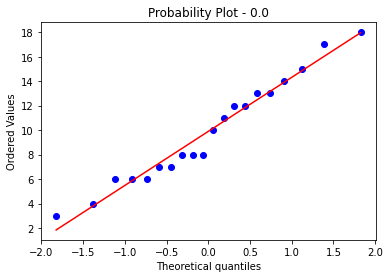

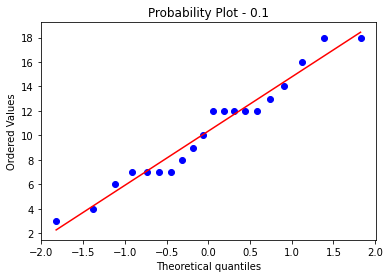

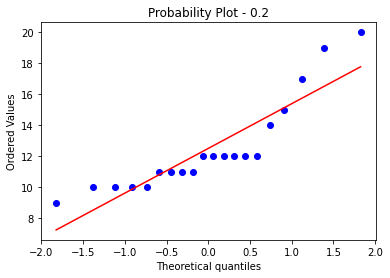

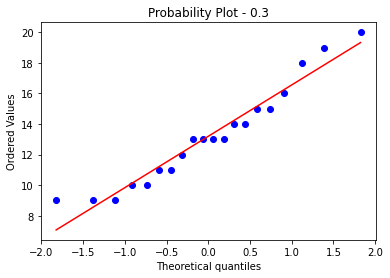

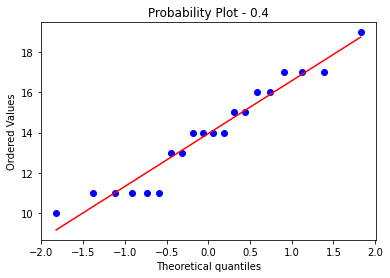

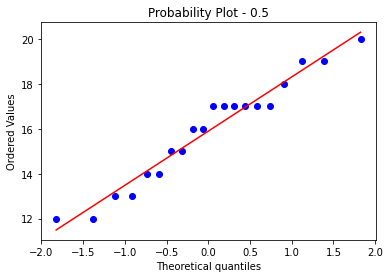

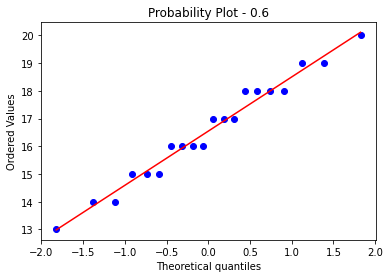

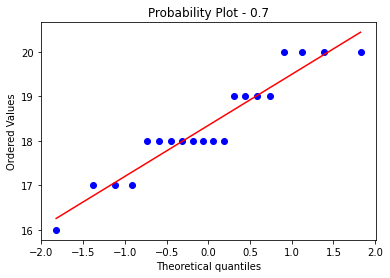

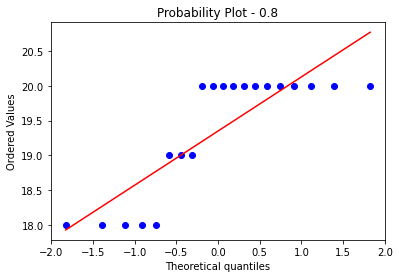

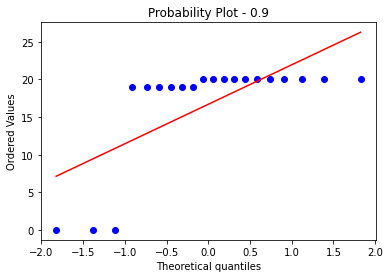

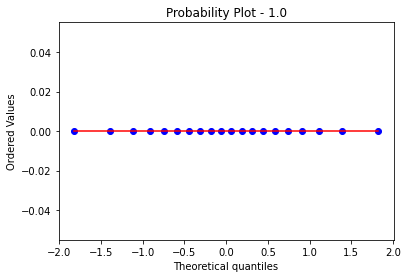

In [33]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['percentage_lazy'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['percentage_lazy'] == major]['num_agents'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

In [34]:
selfishness2 = selfishness[['percentage_lazy', 'num_agents', 'adjusted_fitness']]
selfishness2 = selfishness2.loc[selfishness2['percentage_lazy'] != 1]

In [35]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = selfishness2['num_agents'].mean()
SSTR = selfishness2.groupby('percentage_lazy').count() * (selfishness2.groupby('percentage_lazy').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['num_agents'].sum()

# calculate SSE and update anova table
SSE = (selfishness2.groupby('percentage_lazy').count() - 1) * selfishness2.groupby('percentage_lazy').std()**2
anova_table['SS']['Within Groups'] = SSE['num_agents'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['num_agents'].sum() + SSE['num_agents'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = selfishness2['percentage_lazy'].nunique() - 1
anova_table['df']['Within Groups'] = selfishness2.shape[0] - selfishness2['percentage_lazy'].nunique()
anova_table['df']['Total'] = selfishness2.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1868.33,9,207.592,16.4786,1.11022e-16,2.18139
Within Groups,2393.55,190,12.5976,,,
Total,4261.88,199,21.4165,,,


In [36]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 16.478626586729618  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 16.478626586729618  and critical value is: 2.18138775462775
Null Hypothesis is rejected.


In [37]:
bins = [0, 0.4, 0.6]
names = ['low', 'medium', 'high']

d = dict(enumerate(names, 1))

selfishness2['lazy_range'] = np.vectorize(d.get)(np.digitize(selfishness2['percentage_lazy'], bins))
df = selfishness2

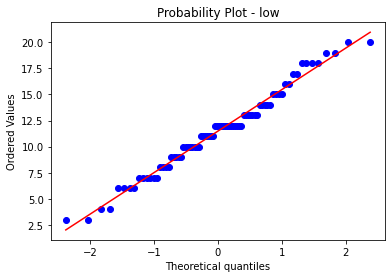

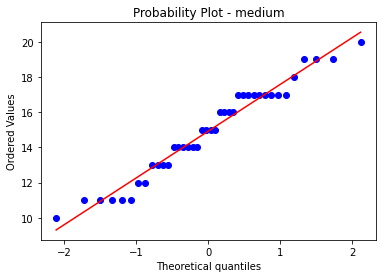

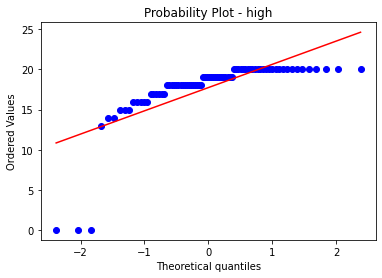

In [38]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = df['lazy_range'].unique()
for major in unique_selfishness:
    stats.probplot(df[df['lazy_range'] == major]['num_agents'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

In [39]:
ratio = df.groupby('lazy_range').std().max() / df.groupby('lazy_range').std().min()
ratio

percentage_lazy     2.221871
num_agents          1.506223
adjusted_fitness    2.184114
dtype: float64

In [40]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df['num_agents'].mean()
SSTR = df.groupby('lazy_range').count() * (df.groupby('lazy_range').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['num_agents'].sum()

# calculate SSE and update anova table
SSE = (df.groupby('lazy_range').count() - 1) * df.groupby('lazy_range').std()**2
anova_table['SS']['Within Groups'] = SSE['num_agents'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['num_agents'].sum() + SSE['num_agents'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df['lazy_range'].nunique() - 1
anova_table['df']['Within Groups'] = df.shape[0] - df['lazy_range'].nunique()
anova_table['df']['Total'] = df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1565.62,2,782.812,57.1958,1.11022e-16,3.75883
Within Groups,2696.25,197,13.6865,,,
Total,4261.87,199,21.4165,,,


In [41]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 57.19575799721839  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 57.19575799721839  and critical value is: 3.7588251784051874
Null Hypothesis is rejected.


In [42]:
df

,percentage_lazy,num_agents,adjusted_fitness,lazy_range
0,0.0,12,19.445556,low
1,0.0,17,32.000278,low
2,0.0,13,17.025278,low
3,0.0,8,11.730972,low
4,0.0,18,22.635972,low
...,...,...,...,...
2205,0.9,20,80.057917,high
2206,0.9,20,49.915000,high
2207,0.9,20,94.226396,high
2208,0.9,19,24.990000,high


In [43]:
df = df3

In [44]:
df['group'] = np.where(
    ((df.percentage_lazy > 0)&(df.percentage_lazy <= 0.3)) & (df.chance_of_selfishness <= 0.4), 
    'low-low',
    np.where((df.percentage_lazy > 0)& ((df.percentage_lazy <= 0.3)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'low-medium',
    np.where((df.percentage_lazy > 0)& ((df.percentage_lazy <= 0.3)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'low-high',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & (df.chance_of_selfishness <= 0.4), 
             'medium-low',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'medium-medium',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'medium-high',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & (df.chance_of_selfishness <= 0.4), 
             'high-low',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'high-medium',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'high-high',
             'extremes')))))))))


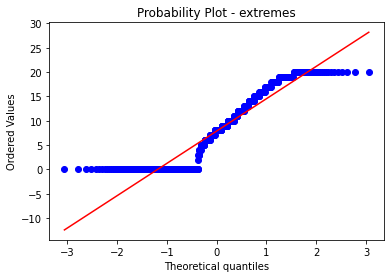

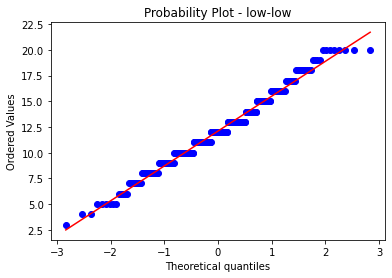

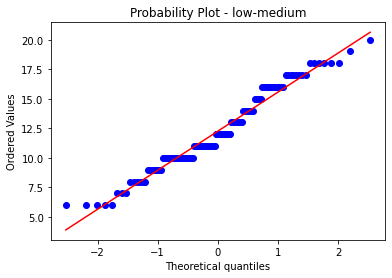

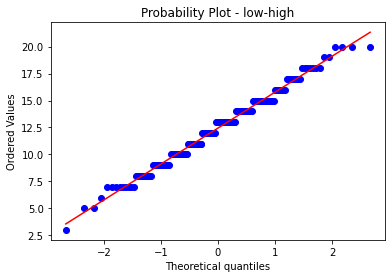

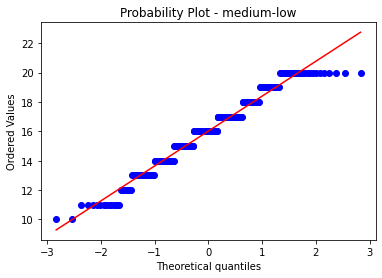

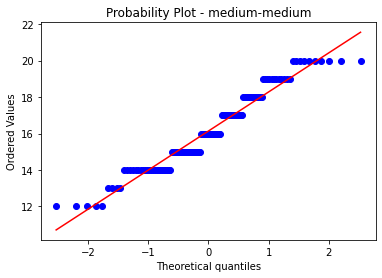

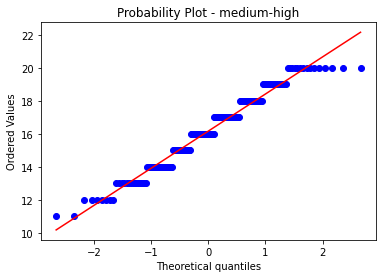

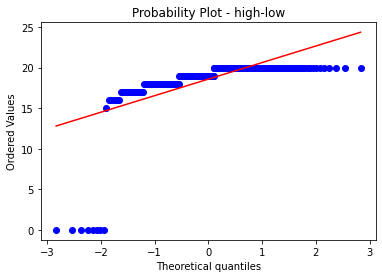

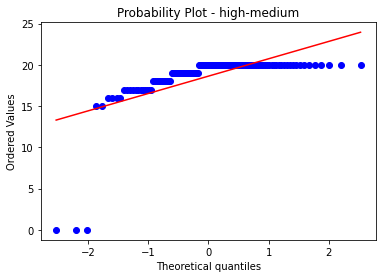

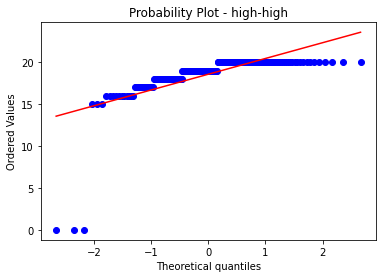

In [45]:
selfishness = df

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['num_agents'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

In [46]:
from scipy import stats

df2 = df[['group', 'num_agents']]

x = df2.loc[df['group'] == 'low-low']['num_agents'].tolist()
xx = df2.loc[df['group'] == 'low-medium']['num_agents'].tolist()
xxx = df2.loc[df['group'] == 'low-high']['num_agents'].tolist()
y = df2.loc[df['group'] == 'medium-low']['num_agents'].tolist()
yy = df2.loc[df['group'] == 'medium-medium']['num_agents'].tolist()
yyy = df2.loc[df['group'] == 'medium-high']['num_agents'].tolist()
z = df2.loc[df['group'] == 'high-low']['num_agents'].tolist()
zz = df2.loc[df['group'] == 'high-medium']['num_agents'].tolist()
zzz = df2.loc[df['group'] == 'high-high']['num_agents'].tolist()

stats.kruskal(x,xx, xxx, y, yy, yyy, z,zz, zz)

KruskalResult(statistic=932.0097077345501, pvalue=7.022347890408262e-196)

In [47]:
data = [x, xx, xxx, y, yy, yyy, z, zz, zzz]

import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3,4,5,6,7,8,9
1,1.000000e+00,1.000000e+00,1.000000e+00,2.583951e-25,4.598204e-15,1.830839e-20,4.187338e-109,5.245446e-65,2.713784e-78
2,1.000000e+00,1.000000e+00,1.000000e+00,9.200976e-14,5.144503e-10,1.797750e-12,5.192643e-61,1.599516e-44,5.413208e-49
3,1.000000e+00,1.000000e+00,1.000000e+00,1.496635e-16,4.872209e-11,2.459044e-14,8.888657e-77,2.758520e-51,1.134812e-58
4,2.583951e-25,9.200976e-14,1.496635e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.182984e-29,2.658115e-18,2.205794e-20
5,4.598204e-15,5.144503e-10,4.872209e-11,1.000000e+00,1.000000e+00,1.000000e+00,2.397827e-16,2.374218e-12,1.534948e-12
6,1.830839e-20,1.797750e-12,2.459044e-14,1.000000e+00,1.000000e+00,1.000000e+00,9.782202e-21,2.356756e-14,3.872977e-15
7,4.187338e-109,5.192643e-61,8.888657e-77,1.182984e-29,2.397827e-16,9.782202e-21,1.000000e+00,1.000000e+00,1.000000e+00
8,5.245446e-65,1.599516e-44,2.758520e-51,2.658115e-18,2.374218e-12,2.356756e-14,1.000000e+00,1.000000e+00,1.000000e+00
9,2.713784e-78,5.413208e-49,1.134812e-58,2.205794e-20,1.534948e-12,3.872977e-15,1.000000e+00,1.000000e+00,1.000000e+00


In [48]:
from scipy import stats

df2 = df[['group', 'adjusted_fitness']]

x = df2.loc[df['group'] == 'low-low']['adjusted_fitness'].tolist()
xx = df2.loc[df['group'] == 'low-medium']['adjusted_fitness'].tolist()
xxx = df2.loc[df['group'] == 'low-high']['adjusted_fitness'].tolist()
y = df2.loc[df['group'] == 'medium-low']['adjusted_fitness'].tolist()
yy = df2.loc[df['group'] == 'medium-medium']['adjusted_fitness'].tolist()
yyy = df2.loc[df['group'] == 'medium-high']['adjusted_fitness'].tolist()
z = df2.loc[df['group'] == 'high-low']['adjusted_fitness'].tolist()
zz = df2.loc[df['group'] == 'high-medium']['adjusted_fitness'].tolist()
zzz = df2.loc[df['group'] == 'high-high']['adjusted_fitness'].tolist()

stats.kruskal(x,xx, xxx, y, yy, yyy, z,zz, zz)

KruskalResult(statistic=1019.73523984371, pvalue=8.205122053405683e-215)

In [49]:
data = [x, xx, xxx, y, yy, yyy, z, zz, zzz]

import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3,4,5,6,7,8,9
1,1.000000e+00,1.000000e+00,1.000000e+00,2.582141e-39,6.481319e-25,5.001370e-30,1.337196e-113,2.411535e-63,1.775642e-81
2,1.000000e+00,1.000000e+00,1.000000e+00,7.328954e-23,1.040291e-17,1.544789e-19,1.202309e-65,8.094065e-45,9.945811e-53
3,1.000000e+00,1.000000e+00,1.000000e+00,1.140443e-29,4.884377e-21,3.685591e-24,1.528995e-85,2.082062e-53,1.942998e-65
4,2.582141e-39,7.328954e-23,1.140443e-29,1.000000e+00,1.000000e+00,1.000000e+00,1.594778e-19,1.979419e-10,4.506578e-13
5,6.481319e-25,1.040291e-17,4.884377e-21,1.000000e+00,1.000000e+00,1.000000e+00,1.529606e-09,3.628896e-06,4.699172e-07
6,5.001370e-30,1.544789e-19,3.685591e-24,1.000000e+00,1.000000e+00,1.000000e+00,2.731403e-14,1.600114e-08,3.559571e-10
7,1.337196e-113,1.202309e-65,1.528995e-85,1.594778e-19,1.529606e-09,2.731403e-14,1.000000e+00,1.000000e+00,1.000000e+00
8,2.411535e-63,8.094065e-45,2.082062e-53,1.979419e-10,3.628896e-06,1.600114e-08,1.000000e+00,1.000000e+00,1.000000e+00
9,1.775642e-81,9.945811e-53,1.942998e-65,4.506578e-13,4.699172e-07,3.559571e-10,1.000000e+00,1.000000e+00,1.000000e+00


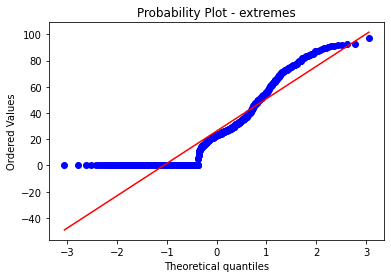

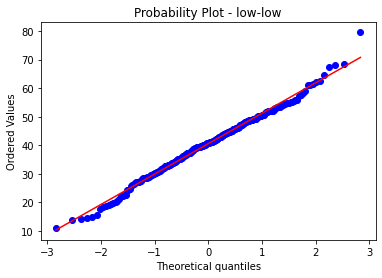

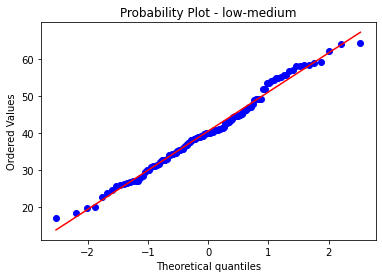

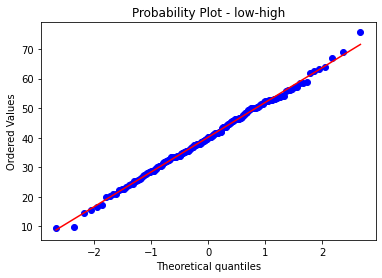

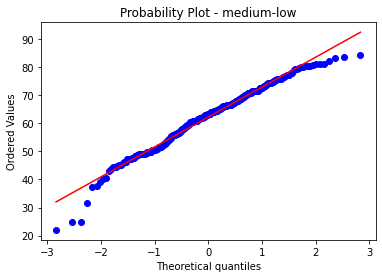

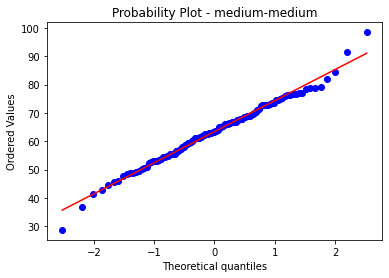

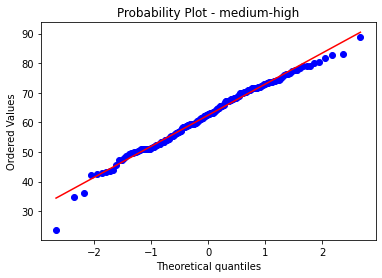

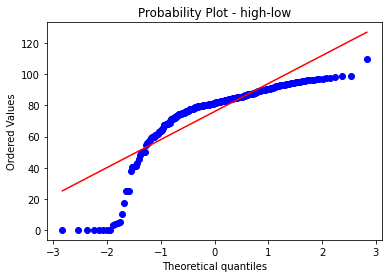

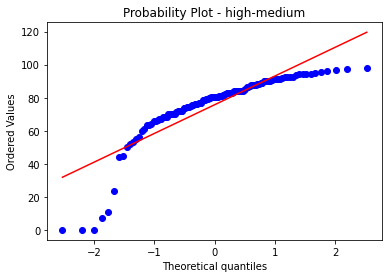

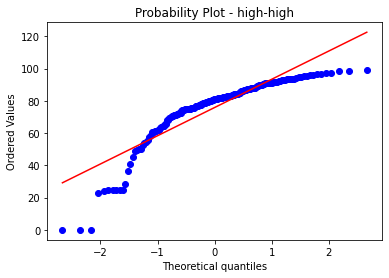

In [50]:
selfishness = df

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['adjusted_fitness'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()